<a href="https://colab.research.google.com/github/zi-onion/24-2-ESAA/blob/main/10_14_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 개정2판 9장 p.584-601

# 9장 추천 시스템

## 01 추천 시스템의 개요와 배경

### 추천 시스템의 개요


### 온라인 스토어의 필수 요소, 추천 시스템

### 추천 시스템의 유형

**추천 시스템**은 크게 콘텐스 기반 필터링, 협업 필터링 방식으로 나뉨.

**협업 필터링 방식**에는 최근접 이웃 협업 필터링과 잠재 요인 협업 필터링이 있음.

## 02 콘텐츠 기반 필터링 추천 시스템


**콘텐츠 기반 필터링 방식**은 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식

## 03 최근접 이웃 협업 필터링

**협업 필터링**: 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것


-> 주요 목표: 사용자一아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가하는 것


**최근접 이웃 협업 필터링(= 메모리(Memory) 협업 필터링)**
- 사용자 기반(User—User): 당신과 비슷한 고객들이 다음 상품도 구매했습니다.
- 아이템 기반(Item네em): 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다.


## 04 잠재 요인 협업 필터링

**잠재 요인 협업 필터링의 이해**

잠재 요인 협업 필터링: 사용자-아이템 평점 매트릭스 속에 숨어있는 잠재 요인을 추출해 추천 예측할 수 있게 하는 기법



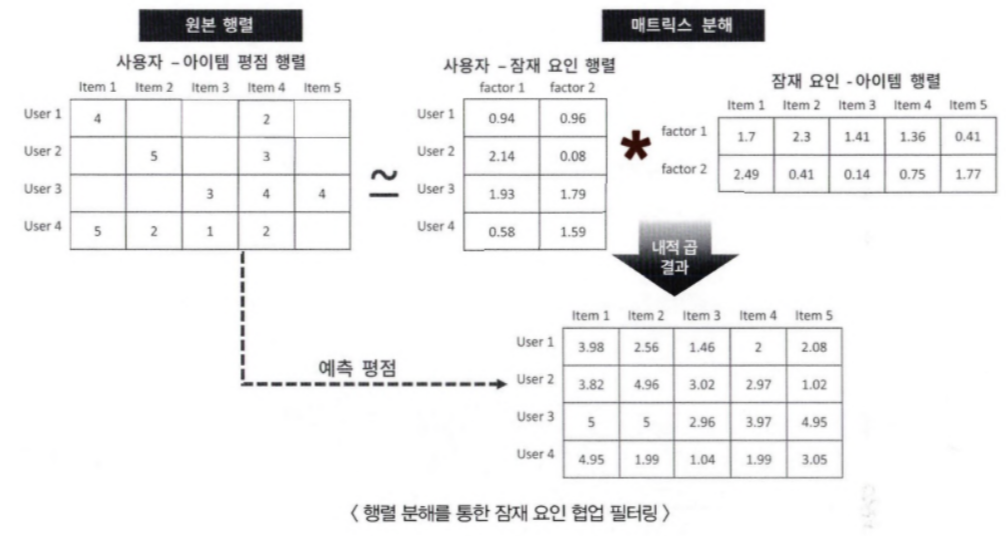

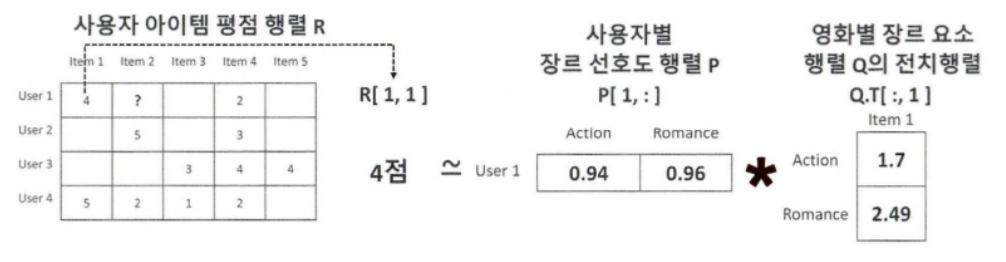

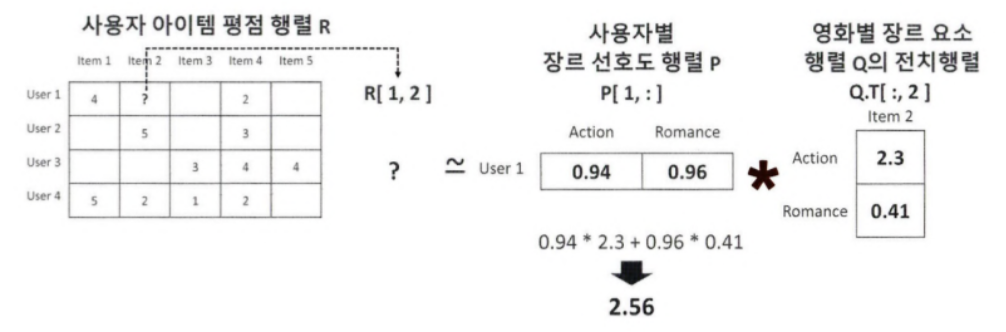

**행렬 분해의 이해**

행렬 분해: 다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법
ex) SVD, NMF 등
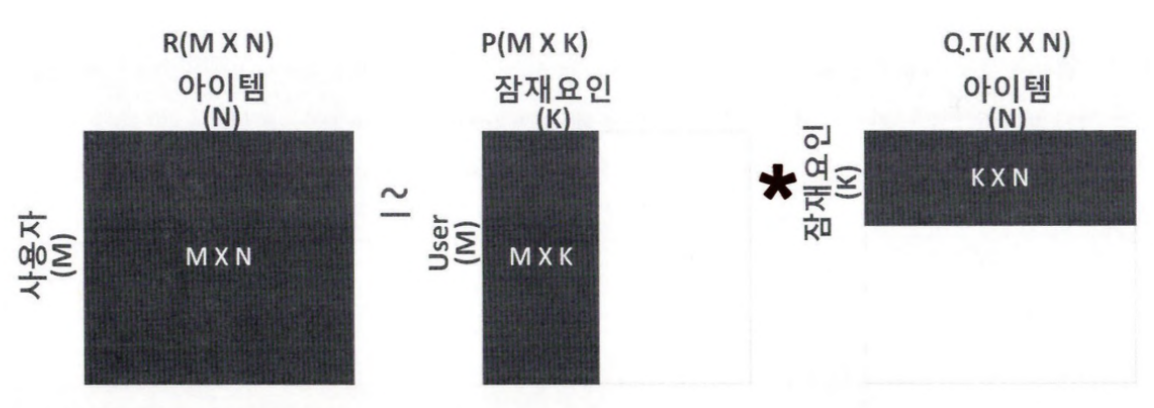

R = P*Q.T

M: 총 사용자 수

N: 아이템 수

K: 잠재 요인의 차원 수

R: MxN차원의 사용자-아이템 평점 행렬

P: 사용자와 잠재 요인과의 관계 값을 가지는 MxK차원의 사용자-잠재 요인 행렬

Q: 아이템과 잠재 요인과의 관계 값을 가지는 NxK차원의 사용자-잠재 요인 행렬

Q.T: Q의 전치 행렬

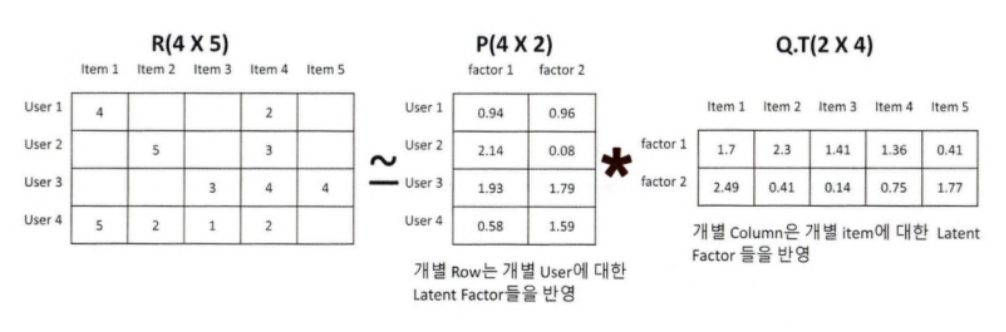

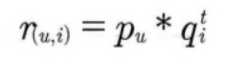

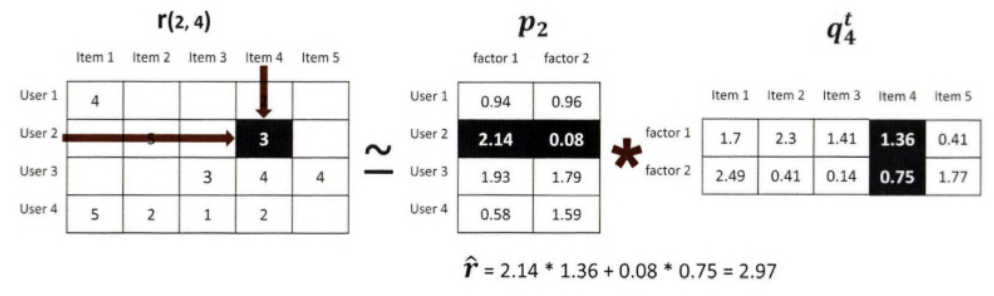

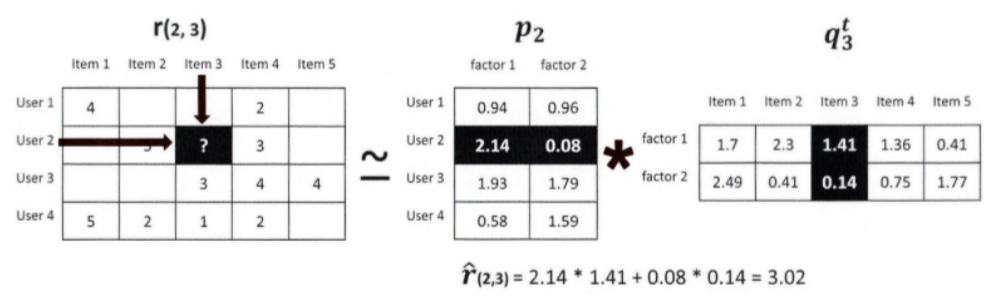

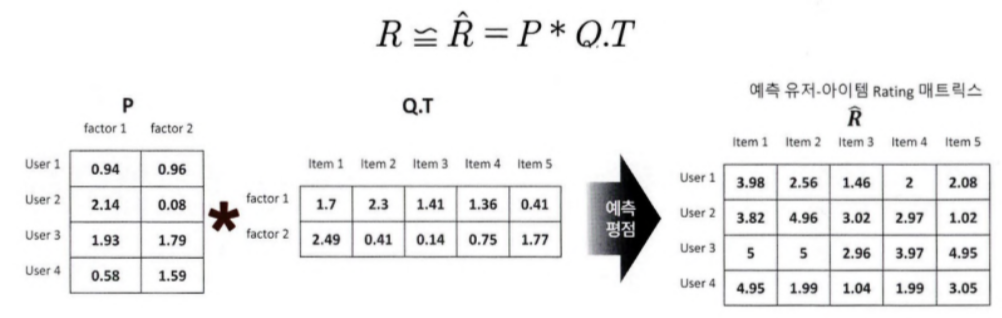

### 확률적 경사 하강법을 이용한 행렬 분해


절차

1. P와 Q를 임의의 값을 가진 행렬로 설정합니다.

2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값을 계산합니다.

3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트합니다.

4. 만족할 만한 오류 값을 가질 때까지 2, 3번 작업을 반복하면서 P와 Q 값을 업데이트해 근사화합니다.

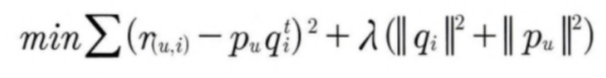

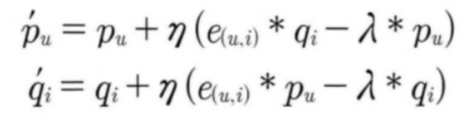


- Pu: P 행렬의 사용자 U행 벡터
- qi: Q 행렬의 아이템 i행의 전치 벡터(transpose vector)

- r(u,i): 실제 R 행렬의 규행, i열에 위치한 값
- r^(u,i) 예측 R 행렬의 유행,i열에 위치한 값 pu* q로 계산



SGD를 이용해 행렬분해 수행

In [2]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재요인 차원 K는 3 설정.
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
              [np.NaN, 5, np.NaN, 3, 1 ],
              [np.NaN, np.NaN, 3, 4, 4 ],
              [5, 2, 1, 2, np.NaN ]])
num_users, num_items = R.shape
K=3

# P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 random한 값으로 입력합니다.
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

실제 R 행렬과 예측 행렬의 오차를 구하는 get_rmse() 생성

In [3]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)

    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]

    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)

    return rmse

SGD 기반으로 행렬 분해 수행

In [4]:
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장.
non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]

steps=1000
learning_rate=0.01
r_lambda=0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트.
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0 :
        print("### iteration step : ", step," rmse : ", rmse)

### iteration step :  0  rmse :  3.2388050277987723
### iteration step :  50  rmse :  0.4876723101369648
### iteration step :  100  rmse :  0.1564340384819247
### iteration step :  150  rmse :  0.07455141311978046
### iteration step :  200  rmse :  0.04325226798579314
### iteration step :  250  rmse :  0.029248328780878973
### iteration step :  300  rmse :  0.022621116143829466
### iteration step :  350  rmse :  0.019493636196525135
### iteration step :  400  rmse :  0.018022719092132704
### iteration step :  450  rmse :  0.01731968595344266
### iteration step :  500  rmse :  0.016973657887570753
### iteration step :  550  rmse :  0.016796804595895633
### iteration step :  600  rmse :  0.01670132290188466
### iteration step :  650  rmse :  0.01664473691247669
### iteration step :  700  rmse :  0.016605910068210026
### iteration step :  750  rmse :  0.016574200475705
### iteration step :  800  rmse :  0.01654431582921597
### iteration step :  850  rmse :  0.01651375177473524
### iterati

분해된 P와 Q를 P*Q.T로 예측행렬 생성

In [5]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
